## Script to plot results of heterochromatin localization study

In [77]:
from os import listdir
from os.path import isfile, join

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [237]:
# specify directory to analyze
myDir=r'S:\ActiveUsers\Kasia\2019_Liu_forMacro\20190426\20190506-MSL\test\results'

Read all the data - original csv files contain measurements for each frame.

In [238]:
myFiles = [f for f in listdir(myDir) if ('nucleusSignal' in f)]

myData=pd.DataFrame()

for f in myFiles:
    
    myData_temp=pd.read_csv(join(myDir, f))
    myData_temp['file']=f
    myData_temp['total']=myData_temp.Area*myData_temp.Mean;
    myData_temp['localization']='nucleus'
    
    try:
        myData = pd.concat([myData,myData_temp],sort=False)
    except:
        myData = myData_temp.copy()
    
    # add euchromatin
    myData_temp=pd.read_csv(join(myDir, f.replace("nucleus", "euChrom")))
    myData_temp['file']=f
    myData_temp['total']=myData_temp.Area*myData_temp.Mean;
    myData_temp['localization']='eu'
    
    myData = pd.concat([myData,myData_temp],sort=False)
    
    # add heterochromatin
    myData_temp=pd.read_csv(join(myDir, f.replace("nucleus", "hetChrom")))
    myData_temp['file']=f
    myData_temp['total']=myData_temp.Area*myData_temp.Mean;
    myData_temp['localization']='het'
    
    myData = pd.concat([myData,myData_temp],sort=False)
    

Summarize data for each cell and then calculate ratios.

In [239]:
myData_cells=myData.groupby(['file','localization'], as_index=False).sum()

In [240]:
myData_cells

,file,localization,Area,Mean,StdDev,Mode,Slice,total
0,10_09-8M-E4(DOWN).czi_nucleusSignal.csv,eu,453918,4795.450,1908.154,3940.365,784,7.583474e+07
1,10_09-8M-E4(DOWN).czi_nucleusSignal.csv,het,32207,4721.081,1597.563,4108.446,529,6.946505e+06
2,10_09-8M-E4(DOWN).czi_nucleusSignal.csv,nucleus,486125,4842.968,1909.141,4068.100,784,8.278120e+07
3,10_09-8M-ES1.czi_nucleusSignal.csv,eu,570366,8693.745,3707.228,7646.047,775,1.758827e+08
4,10_09-8M-ES1.czi_nucleusSignal.csv,het,43610,10678.860,3551.019,9215.828,625,1.979973e+07
5,10_09-8M-ES1.czi_nucleusSignal.csv,nucleus,613976,8871.030,3755.807,7784.725,775,1.956823e+08
6,10_E2_nucleusSignal.csv,eu,544523,5036.978,2517.015,4094.560,675,9.969692e+07
7,10_E2_nucleusSignal.csv,het,20074,5020.406,1786.500,4094.628,585,4.232338e+06
8,10_E2_nucleusSignal.csv,nucleus,564597,5046.916,2499.078,4113.269,675,1.039293e+08
9,10_L2.czi_nucleusSignal.csv,eu,562016,9376.249,4205.004,7883.762,540,2.062029e+08


In [241]:
def group_norm(group):
    # find norm factors/group
    area_norm_factor=np.array(group.loc[group.localization=='nucleus','Area'])[0]
    signal_norm_factor=np.array(group.loc[group.localization=='nucleus','total'])[0]
    #modify dataframe
    group['volume_norm']=group.Area/area_norm_factor
    group['signal_norm']=group.total/signal_norm_factor
    return group

In [242]:
myData_cells=myData_cells.groupby(['file'],as_index=False).apply(group_norm)

In [243]:
myData_cells

,file,localization,Area,Mean,StdDev,Mode,Slice,total,volume_norm,signal_norm
0,10_09-8M-E4(DOWN).czi_nucleusSignal.csv,eu,453918,4795.450,1908.154,3940.365,784,7.583474e+07,0.933747,0.916087
1,10_09-8M-E4(DOWN).czi_nucleusSignal.csv,het,32207,4721.081,1597.563,4108.446,529,6.946505e+06,0.066253,0.083914
2,10_09-8M-E4(DOWN).czi_nucleusSignal.csv,nucleus,486125,4842.968,1909.141,4068.100,784,8.278120e+07,1.000000,1.000000
3,10_09-8M-ES1.czi_nucleusSignal.csv,eu,570366,8693.745,3707.228,7646.047,775,1.758827e+08,0.928971,0.898817
4,10_09-8M-ES1.czi_nucleusSignal.csv,het,43610,10678.860,3551.019,9215.828,625,1.979973e+07,0.071029,0.101183
5,10_09-8M-ES1.czi_nucleusSignal.csv,nucleus,613976,8871.030,3755.807,7784.725,775,1.956823e+08,1.000000,1.000000
6,10_E2_nucleusSignal.csv,eu,544523,5036.978,2517.015,4094.560,675,9.969692e+07,0.964445,0.959276
7,10_E2_nucleusSignal.csv,het,20074,5020.406,1786.500,4094.628,585,4.232338e+06,0.035555,0.040723
8,10_E2_nucleusSignal.csv,nucleus,564597,5046.916,2499.078,4113.269,675,1.039293e+08,1.000000,1.000000
9,10_L2.czi_nucleusSignal.csv,eu,562016,9376.249,4205.004,7883.762,540,2.062029e+08,0.943702,0.927375


### Plots

Volume of heterochromatin vs euchromatin.

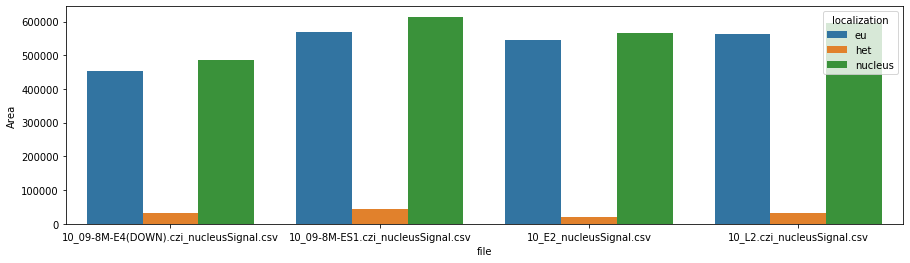

In [251]:
plt.figure(figsize=(15,4))
sns.barplot(x="file", y="Area", hue="localization", data=myData_cells)

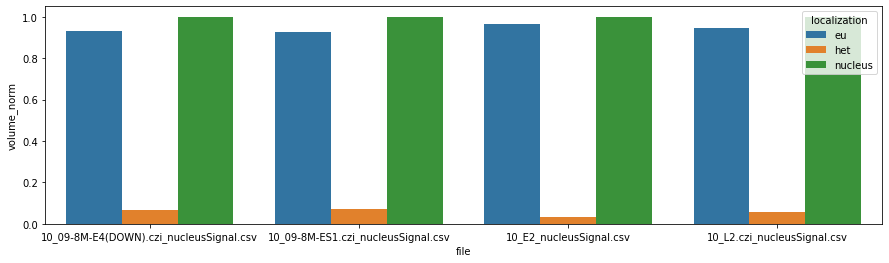

In [250]:
plt.figure(figsize=(15,4))
sns.barplot(x="file", y="volume_norm", hue="localization", data=myData_cells)

Plot total signal in different structures.

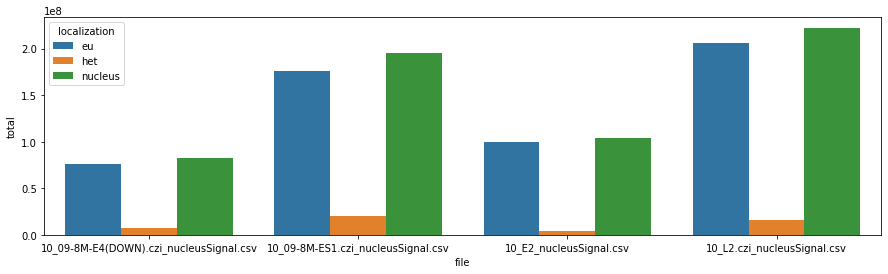

In [248]:
plt.figure(figsize=(15,4))
sns.barplot(x="file", y="total", hue="localization", data=myData_cells)

Plot ratios in different chromatin structures.

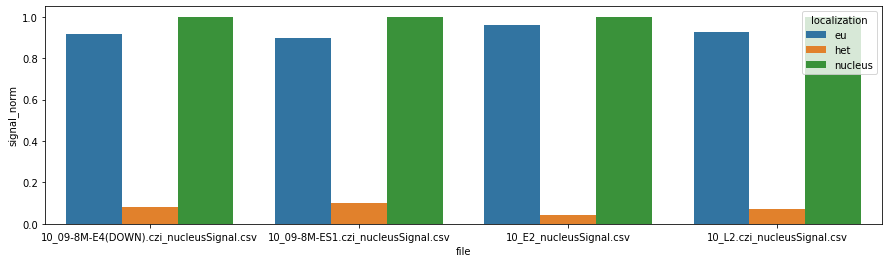

In [252]:
plt.figure(figsize=(15,4))
sns.barplot(x="file", y="signal_norm", hue="localization", data=myData_cells)